In [2]:
# computer vision practice

# pillow import 
from PIL import Image

# IMPORTS
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

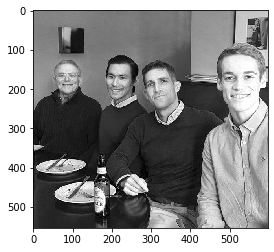

In [3]:
# PILLOW 

fp1 = './data/shapiro.png'
img1 = Image.open(fp1) # relative or absolute
# check type
type(img1) # PIL.JpegImagePlugin.JpegImageFile
# convert to array
img_arr = np.asarray(img1)
# info about array
img_arr.shape # (dimensions -- x, y, z) (pixels x, pixels y, bands)
# plot array as image
plt.imshow(img_arr)
# get red band 
img_arr_red = np.array(img_arr[:,:,0])
plt.imshow(img_arr_red, cmap='gray')

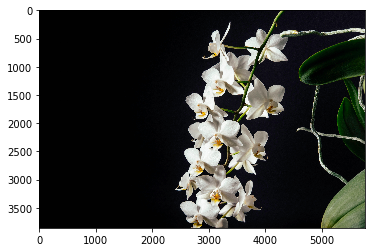

In [4]:
# OPENCV

# PLOT IMAGE
# import image (and convert to array)
fp1 = './data/orchid.jpg'
img1 = cv2.imread(fp1)
type(img1) # numpy.ndarray (if fp1 doesn't exist, type will be 'NoneType')
# matplotlib expects RGB, opencv uses BGR. this function makes the image RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

(500, 500, 3)


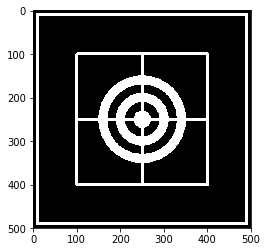

In [4]:
# -------------
# OPENCV (drawing on images)
# -------------


# CREATE IMG
img1 = np.zeros(shape=(500,500,3), dtype=np.int16)
print(img1.shape)

# DRAW
# rectangle (pt1 & pt2 are the corners)
cv2.rectangle(img1, pt1=(10,10), pt2=(490,490), color=(255,255,255), thickness=5)
# circles
cv2.circle(img1, center=(250,250), radius=90, color=(255,255,255), thickness=20 )
cv2.circle(img1, center=(250,250), radius=50, color=(255,255,255), thickness=20 )
cv2.circle(img1, center=(250,250), radius=20, color=(255,255,255), thickness=-1 )
# straight line
cv2.line(img1, pt1=(100,250), pt2=(400,250), color=(255,255,255), thickness=5)
cv2.line(img1, pt1=(250,100), pt2=(250,400), color=(255,255,255), thickness=5)
# polygon
vertices = np.array([ [100,100], [100,400], [400,400], [400,100] ])
pts = vertices.reshape(-1,1,2) # shape (4,2) to (4,1,2)
cv2.polylines(img1, [pts], isClosed=True, color=(255,255,255), thickness=5)

# plot image
plt.imshow(img1)


(554, 598, 3) (549, 582, 3)
(554, 598, 3) (554, 598, 3)


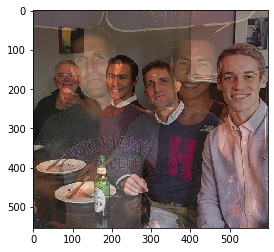

In [5]:
# -------------
# OpenCV (blending and pasting images)
# -------------

# weighted blending
    # pixel = α * pixel1 + β * pixel2 + γ

# BLEND IMAGES (different size)
# import images
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
fp2 = './data/shapiro2.png'
img2 = cv2.imread(fp2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# resize
print( img1.shape, img2.shape )
dimensions = img1.shape # rows, cols, bands
img2 = cv2.resize(img2, (dimensions[1], dimensions[0])) # x, y
print( img1.shape, img2.shape )
# blend
img3 = cv2.addWeighted(src1=img1, alpha=.6, src2=img2, beta=.4, gamma=0 )
# plot blended image
plt.imshow(img3)


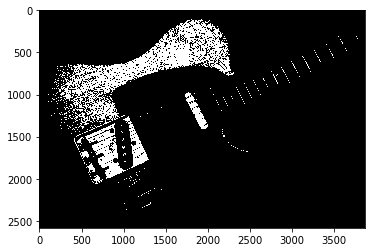

In [6]:
# -------------
# OpenCV (thresholding)
# -------------

# THRESHOLDING
# import image (grayscale)
fp1 = 'data/telecaster.jpg'
img1 = cv2.imread(fp1, 0)
# threshold (returns tuple)
thresh_val, output_img = cv2.threshold(src=img1, thresh=110, maxval=255, type=cv2.THRESH_BINARY)
# plot image
plt.imshow(output_img, cmap='gray')


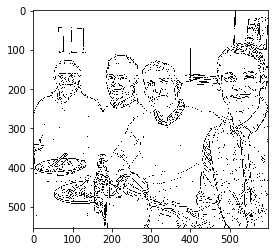

In [8]:

# ADAPTIVE THRESHOLDING
# import image (grayscale)
fp2 = './data/shapiro.png'
img2 = cv2.imread(fp2, 0)
# threshold (returns tuple)
output_img2 = cv2.adaptiveThreshold(src=img2, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=5, C=8)
# plot image
plt.imshow(output_img2, cmap='gray')

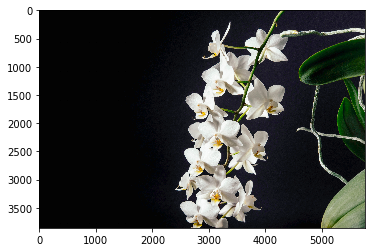

In [9]:
# -------------
# OpenCV (gamma correction)
# -------------

# IMPORTS
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# GAMMA CORRECTION
# load image
fp1 = './data/orchid.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# gamma correction (pixel value ^ gamma)
gamma = 3/4 # 0 < gamma < 1 (brighter), gamma > 1 (darker)
img1 = np.power(img1/255, gamma) # (I/255)^γ
# plot image
plt.imshow(img1)

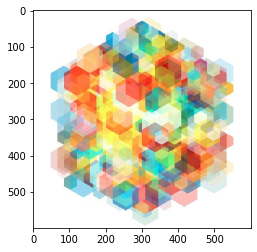

In [10]:
# -------------
# OpenCV (blurring and smoothing images)
# -------------

# BLUR (concept)
# basically takes a weighted average of a pixel with its surrounding pixels.
# kernel example
    # 3 x 3 matrix, mutliply by values below, the sum becomes the new pixel value
    # (.0625) (.125) (.0625)
    # (.125) (.25) (.125)
    # (.0625) (.125) (.0625)


# BLUR
# load image
fp1 = './data/polaris.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# blur image 
kernel = np.ones(shape=(3,3), dtype=np.float32)/9
img2 = cv2.filter2D(src=img1, ddepth=-1, kernel=kernel, anchor=(-1,-1) )
# plot image
plt.imshow(img2)

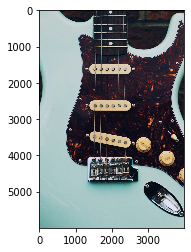

In [11]:
# BLUR (v2) (built in kernel)
# load image
fp1 = './data/stratocaster.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# blur image 
img2 = cv2.blur(src=img1, ksize=(5,5))
# plot image
plt.imshow(img2)

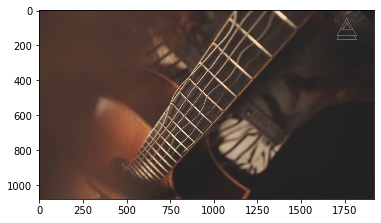

In [12]:
# BLUR (gaussian)
# load image
fp1 = './data/encomium.png'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# blur image 
img2 = cv2.GaussianBlur(src=img1, ksize=(3,3), sigmaX=10) # sigmaY (stddev) is assumed
# plot image
plt.imshow(img2)

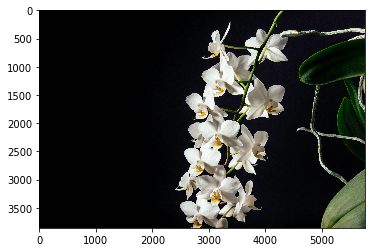

In [13]:
# BLUR (median)
# load image
fp1 = './data/orchid.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# blur image 
img2 = cv2.medianBlur(src=img1, ksize=3) 
# plot image
plt.imshow(img2)

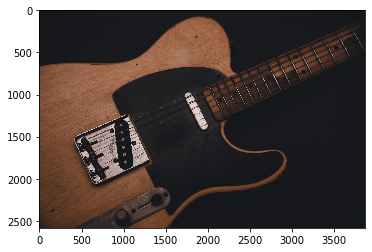

In [14]:
# BLUR (bilateral filtering)
# load image
fp1 = './data/telecaster.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# blur image 
img2 = cv2.bilateralFilter(src=img1, d=9, sigmaColor=75, sigmaSpace=75 ) 
# plot image
plt.imshow(img2)

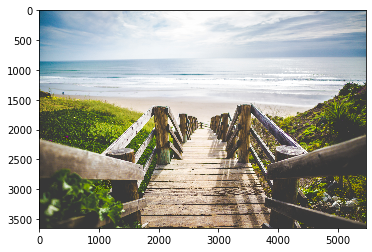

In [15]:
# -------------
# OpenCV (morphological operator)
# -------------

# ERODE BOUNDARIES
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# erode boundaries
kernel = np.ones((3,3), dtype=np.uint8)
img2 = cv2.erode(src=img1, kernel=kernel, iterations=1)
# plot image
plt.imshow(img2)

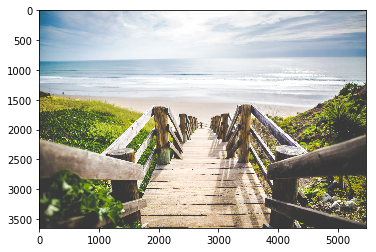

In [15]:
# DILATE BOUNDARIES (increase white area)
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# dilate boundaries
kernel = np.ones((3,3), dtype=np.uint8)
img2 = cv2.dilate(src=img1, kernel=kernel, iterations=1)
# plot image
plt.imshow(img2)

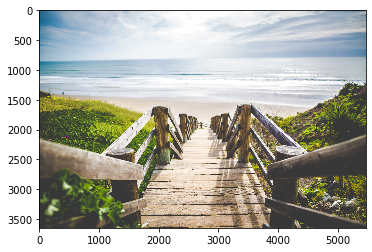

In [16]:
# OPENING (erode, then dilate) (remove noise)
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# dilate boundaries
kernel = np.ones((3,3), dtype=np.uint8)
img2 = cv2.morphologyEx(src=img1, op=cv2.MORPH_OPEN, kernel=kernel, iterations=1)
# plot image
plt.imshow(img2)

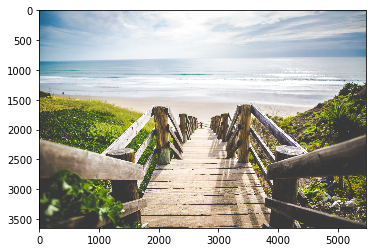

In [17]:
# CLOSING (dilate, then erode) (remove black noise)
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# dilate boundaries
kernel = np.ones((3,3), dtype=np.uint8)
img2 = cv2.morphologyEx(src=img1, op=cv2.MORPH_CLOSE, kernel=kernel, iterations=1)
# plot image
plt.imshow(img2)

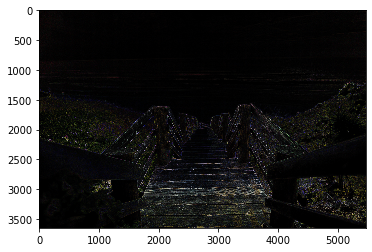

In [18]:
# MORPHOLOGICAL GRADIENT (dilation - erosion)
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# dilate boundaries
kernel = np.ones((3,3), dtype=np.uint8)
img2 = cv2.morphologyEx(src=img1, op=cv2.MORPH_GRADIENT, kernel=kernel, iterations=1)
# plot image
plt.imshow(img2)

In [19]:
# GRADIENTS
# load image
fp1 = './data/circles.png'
img1 = cv2.imread(fp1, 0)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# gradient (x)
img2 = cv2.Sobel(src=img1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
# plot image
# plt.imshow(img2, cmap='gray')

In [20]:
# GRADIENTS (Laplacian)
# load image
fp1 = './data/circles.png'
img1 = cv2.imread(fp1, 0)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# gradient (x)
img2 = cv2.Laplacian(src=img1, ddepth=cv2.CV_64F, ksize=5)
# plot image
# plt.imshow(img2, cmap='gray')

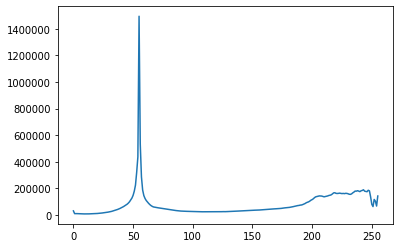

In [22]:
# -------------
# OpenCV (histograms)
# -------------

# HISTOGRAM
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
# compute histogram
hist1 = cv2.calcHist(images=[img1], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# plot histogram
plt.plot(hist1)

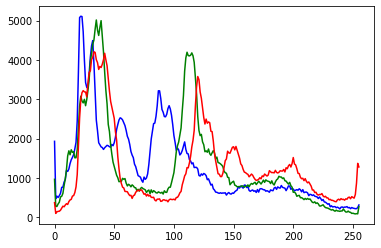

In [23]:
# HISTOGRAM (3 bands)
# load image
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1)
# enumerate through bands
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist = cv2.calcHist(images=[img1], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=c)

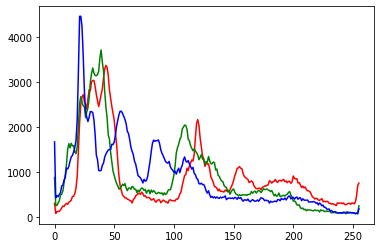

In [24]:
# HISTOGRAM (with mask)
# load image
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# mask
mask = np.zeros(shape=img1.shape[:2], dtype=np.uint8) # rows, cols, but not bands
mask[50:-50, 50:-50] = 255 # rows slice, cols slice (assuming rows/cols > 50)
img1m = cv2.bitwise_and(src1=img1, src2=img1, mask=mask)
# show
# plt.imshow(img1m)
# histogram
color = ('r', 'g', 'b')
for i,c in enumerate(color):
    hist = cv2.calcHist(images=[img1m], channels=[i], mask=mask, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=c)


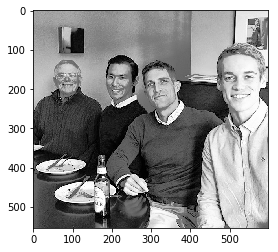

In [41]:
# HISTOGRAM EQUALIZATION
# load image
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.equalizeHist(img1)
# plot image
plt.imshow(img2, cmap='gray')

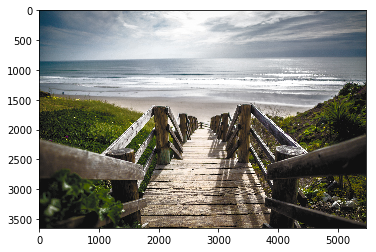

In [25]:
# HISTOGRAM EQUALIZATION (color)
# load image
fp1 = './data/beach.jpg'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
# equalize (HSV insead of BGR (value is needed))
img1[:,:,2] = cv2.equalizeHist(img1[:,:,2])
# convert back to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_HSV2RGB)
# plot image
plt.imshow(img1)

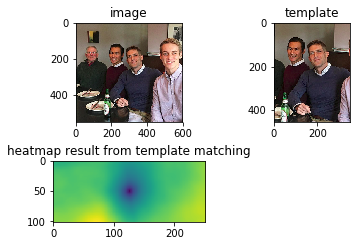

In [26]:
# TEMPLATE MATCHING
# load image
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# create smaller image
img2 = img1[50:-50,125:-125]
# template match
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_CCOEFF)
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_CCOEFF_NORMED)
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_CCORR)
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_CCORR_NORMED)
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_SQDIFF)
img3 = cv2.matchTemplate(image=img1, templ=img2, method=cv2.TM_SQDIFF_NORMED)
# get values from resulting heatmap
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img3)
# plot image (subplot)
plt.subplot(2,2,1) # rows, cols, index
plt.imshow(img1)
plt.title('image')
plt.subplot(2,2,2) 
plt.imshow(img2)
plt.title('template')
plt.subplot(2,2,3) 
plt.imshow(img3)
plt.title('heatmap result from template matching')

plt.show()

Text(0.5, 1.0, 'highlighted')

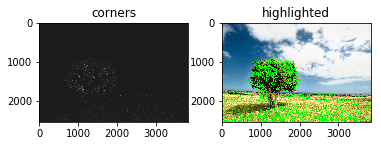

In [27]:
# -------------
# OpenCV (harris corner detection)
# -------------

# corner -- junction of two edges (edges -- sudden change in image brightness)

# CORNER DETECTION
# load image
fp1 = './data/tree.jpg'
img0 = cv2.imread(fp1)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
# convert values to floats
img1 = np.float32(img1)
# harris corner detection
img2 = cv2.cornerHarris(src=img1, blockSize=2, ksize=3, k=0.04)
img2 = cv2.dilate(img2, None)
# highlight corners on original image
img0[img2 > 0.01*img2.max()] = [0,255,0]
# plot images
plt.subplot(2,2,1)
plt.imshow(img2, cmap='gray')
plt.title('corners')
plt.subplot(2,2,2)
plt.imshow(img0)
plt.title('highlighted')


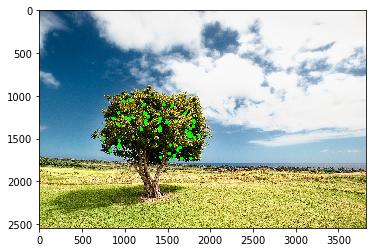

In [28]:
# SHI-TOMASI CORNER DETECTION
# load image
fp1 = './data/tree.jpg'
img0 = cv2.imread(fp1)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
# create grayscale image for corner detection
img1 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)

# blur (this step helped on tree.jpg)
img1 = cv2.blur(src=img1, ksize=(5,5))
img1 = cv2.blur(src=img1, ksize=(5,5))

# shi-tomasi corner detection
img2 = cv2.goodFeaturesToTrack(image=img1, maxCorners=50, qualityLevel=0.01, minDistance=10)
# draw on corners
img2 = np.int0(img2)
for c in img2:
    x,y = c.ravel()
    cv2.circle(img0, (x,y), radius=20, color=(0,255,0), thickness=-1)
# plot images
plt.imshow(img0)

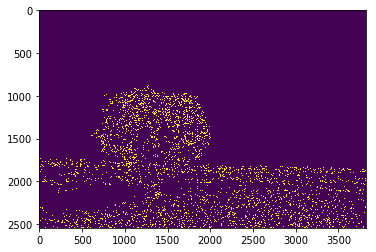

In [29]:
# -------------
# OpenCV (canny edge detector)
# -------------

# CANNY EDGE DETECTOR
# load image
fp1 = './data/tree.jpg'
img1 = cv2.imread(fp1)
# blur (remove noise)
img1 = cv2.blur(src=img1, ksize=(5,5))
# edge detection
img2 = cv2.Canny(image=img1, threshold1=120, threshold2=180)
# plot image
plt.imshow(img2)

183.0 146 219


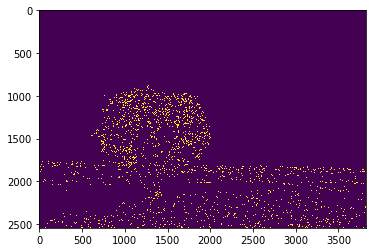

In [30]:
# CANNY EDGE DETECTOR (using median pixel value)
# load image
fp1 = './data/tree.jpg'
img1 = cv2.imread(fp1)
# get median pixel value
median1 = np.median(img1)
# calculate thresholds based on median
img1_t1 = int(max(0, median1*.8)) # between median and 0
img1_t2 = int(min(255, median1*1.2)) # between median and 255
print(median1, img1_t1, img1_t2)
# blur (remove noise)
img1 = cv2.blur(src=img1, ksize=(5,5))
# edge detection 
img2 = cv2.Canny(image=img1, threshold1=img1_t1, threshold2=img1_t2) 
# plot image
plt.imshow(img2)

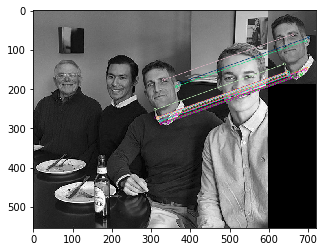

(<matplotlib.image.AxesImage at 0x7ff5b46187f0>, None)

In [31]:
# BRUTE FORCE (with ORB)
# load images
fp1 = './data/shapiro.png'
fp2 = './data/shapiro3.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (orb)
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=5000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# get keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# match descriptors
matches = bf.match(des1, des2)
# sort by distance
matches = sorted(matches, key=lambda x: x.distance)
# draw best matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], outImg=None, flags=2)
# plot matched illustration
plt.imshow(img3), plt.show()

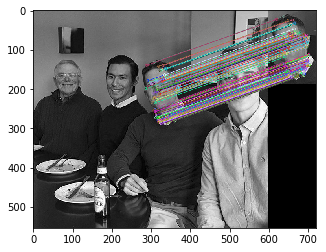

(<matplotlib.image.AxesImage at 0x7ff5b448b4a8>, None)

In [32]:
# -------------
# OpenCV (feature matching) (orb/bf/knn)
# -------------

# BRUTE FORCE 
# load images
fp1 = './data/shapiro.png'
fp2 = './data/shapiro3.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (orb)
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=10000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# get keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# create BFMatcher object
bf = cv2.BFMatcher()
# find matches
matches = bf.knnMatch(des1, des2, k=2) # knnMatch -- finds the k best matches for each descriptor
# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .5):
        good.append([m])
# draw matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, outImg=None, flags=2)
plt.imshow(img3), plt.show()


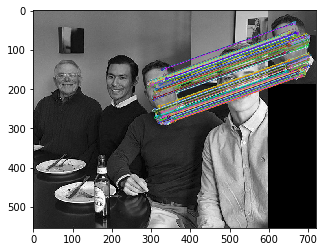

(<matplotlib.image.AxesImage at 0x7ff5b45ec278>, None)

In [33]:
# -------------
# OpenCV (feature matching) (orb/flann/knn)
# -------------

# FLANN
# load images
fp1 = './data/shapiro.png'
fp2 = './data/shapiro3.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (orb)
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=5000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# get keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)
# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .5):
        good.append([m])
# draw matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, outImg=None, flags=2)
plt.imshow(img3), plt.show()

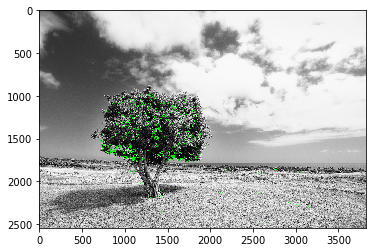

(<matplotlib.image.AxesImage at 0x7ff5b4af12b0>, None)

In [34]:
# -------------
# OpenCV (feature detection) (orb -- harris corner)
# -------------

fp1 = './data/tree.jpg'
img1 = cv2.imread(fp1, 0)
# Initiate ORB detector
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=5000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

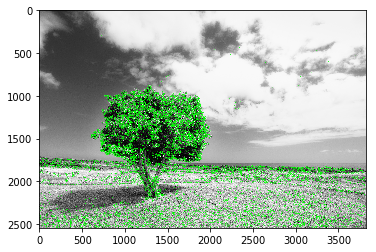

(<matplotlib.image.AxesImage at 0x7ff5b42df748>, None)

In [35]:
# -------------
# OpenCV (feature detection) (kaze -- blob)
# -------------


# load images
fp1 = './data/tree.jpg'
img1 = cv2.imread(fp1, 0)
# initiate detector (kaze)
kaze = cv2.KAZE_create()
# get keypoints and descriptors
kp1, des1 = kaze.detectAndCompute(img1, None)

# print(des1[0], des1[round(len(des1)/2)],des1[-1])

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

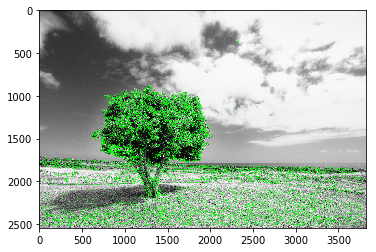

(<matplotlib.image.AxesImage at 0x7ff5b439d048>, None)

In [36]:
# -------------
# OpenCV (feature detection) (akaze -- blob)
# -------------


# load images
fp1 = './data/tree.jpg'
img1 = cv2.imread(fp1, 0)
# initiate detector (akaze)
akaze = cv2.AKAZE_create()
# get keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)


# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

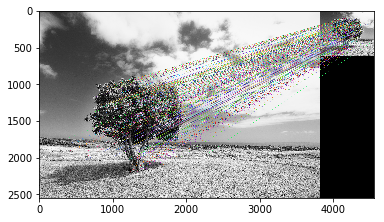

(<matplotlib.image.AxesImage at 0x7ff5b452fc18>, None)

In [37]:
# -------------
# OpenCV (feature matching) (akaze/flann/knn)
# -------------

# load images
fp1 = './data/tree.jpg'
fp2 = './data/tree.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (akaze)
akaze = cv2.AKAZE_create()
# get keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)
# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)
# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .4):
        good.append([m])
# draw matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, outImg=None, flags=2)
plt.imshow(img3), plt.show()

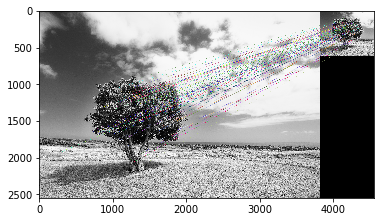

(<matplotlib.image.AxesImage at 0x7ff5b4087b38>, None)

In [38]:
# -------------
# OpenCV (feature matching) (orb/flann/knn)
# -------------

# FLANN
# load images
fp1 = './data/tree.jpg'
fp2 = './data/tree.png'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (orb)
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=5000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# get keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)
# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .5):
        good.append([m])
# draw matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, outImg=None, flags=2)
plt.imshow(img3), plt.show()

getting kp and des
getting matches
filtering matches


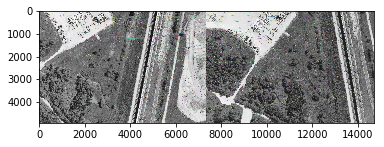

(<matplotlib.image.AxesImage at 0x7ff5b4b8c9b0>, None)

In [42]:
# -------------
# OpenCV (feature matching) (akaze/flann/knn)
# -------------

print('getting kp and des')

# FLANN
# load images
fp1 = './data/9a.jpg'
fp2 = './data/9b.jpg'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (akaze)
akaze = cv2.AKAZE_create()
# get keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

print('getting matches')

# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)

print('filtering matches')

# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .4):
        good.append([m]) # drawMatchesKnn expects list
# draw matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, outImg=None, flags=2)
plt.imshow(img3), plt.show()

Text(0.5, 1.0, 'warp2')

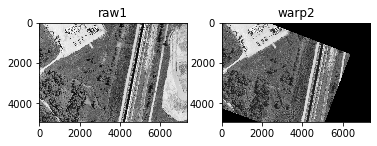

In [25]:
# -------------
# OpenCV (feature matching & homography) (akaze/flann/knn)
# -------------

# FLANN
# load images
fp1 = './data/9a.jpg'
fp2 = './data/9b.jpg'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (akaze)
akaze = cv2.AKAZE_create()
# get keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)


# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)

# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .4):
        good.append(m)
    
# homography
if len(good) > 4:
    list_kp1 = []
    list_kp2 = []
    for match in good:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        # Get points
        point1 = kp1[img1_idx].pt
        point2 = kp2[img2_idx].pt
        # append point to list
        list_kp1.append(point1)
        list_kp2.append(point2)
        
    H, mask = cv2.findHomography(
        srcPoints=np.array(list_kp2), 
        dstPoints=np.array(list_kp1), 
        method=cv2.RANSAC, 
        ransacReprojThreshold=4
    )
    
    h, w = img1.shape
    img3 = cv2.warpPerspective(img2, H, (w,h))
    
# plot images
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.title('raw1')
plt.subplot(2,2,2)
plt.imshow(img3, cmap='gray')
plt.title('warp2')


good: 50


Text(0.5, 1.0, 'warp2')

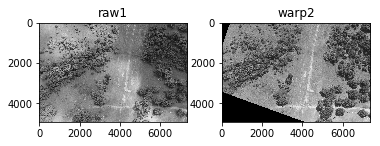

In [4]:
# -------------
# OpenCV (feature matching & homography) (akaze/flann/knn)
# -------------

# FLANN
# load images
fp1 = './data/1214a.jpg'
fp2 = './data/1214b.jpg'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (akaze)
akaze = cv2.AKAZE_create()
# get keypoints and descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)


# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)

# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .6):
        good.append(m)
    
# homography
print(f"good: {len(good)}")
if len(good) > 4:
    list_kp1 = []
    list_kp2 = []
    for match in good:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        # Get points
        point1 = kp1[img1_idx].pt
        point2 = kp2[img2_idx].pt
        # append point to list
        list_kp1.append(point1)
        list_kp2.append(point2)
        
    H, mask = cv2.findHomography(
        srcPoints=np.array(list_kp2), 
        dstPoints=np.array(list_kp1), 
        method=cv2.RANSAC, 
        ransacReprojThreshold=4
    )
    
    h, w = img1.shape
    img3 = cv2.warpPerspective(img2, H, (w,h))
    
# plot images
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.title('raw1')
plt.subplot(2,2,2)
plt.imshow(img3, cmap='gray')
plt.title('warp2')


good: 17


Text(0.5, 1.0, 'warp2')

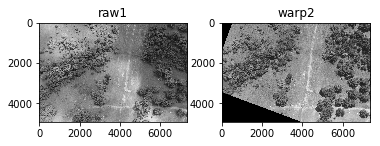

In [8]:
# -------------
# OpenCV (feature matching & homography) (orb/flann/knn)
# -------------

# FLANN
# load images
fp1 = '1214a.jpg'
fp2 = '1214b.jpg'
img1 = cv2.imread(fp1, 0)
img2 = cv2.imread(fp2, 0)
# initiate detector (orb)
orb_params = dict(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=30000, firstLevel=0)
orb = cv2.ORB_create(**orb_params)
# get keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# params for FlannBasedMatcher
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1) 
search_params = dict(checks=50)
# create flann object
flann = cv2.FlannBasedMatcher(index_params, search_params)
# find matches
matches = flann.knnMatch(des1, des2, k=2)

# lowe's ratio test to filter good matches
good = []
for m_n in matches:
    if len(m_n) != 2:
        continue
    (m,n) = m_n
    if m.distance < (n.distance * .6):
        good.append(m)
    
# homography
print(f"good: {len(good)}")
if len(good) > 4:
    list_kp1 = []
    list_kp2 = []
    for match in good:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        # Get points
        point1 = kp1[img1_idx].pt
        point2 = kp2[img2_idx].pt
        # append point to list
        list_kp1.append(point1)
        list_kp2.append(point2)
        
    H, mask = cv2.findHomography(
        srcPoints=np.array(list_kp2), 
        dstPoints=np.array(list_kp1), 
        method=cv2.RANSAC, 
        ransacReprojThreshold=4
    )
    
    h, w = img1.shape
    img3 = cv2.warpPerspective(img2, H, (w,h))
    
# plot images
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.title('raw1')
plt.subplot(2,2,2)
plt.imshow(img3, cmap='gray')
plt.title('warp2')


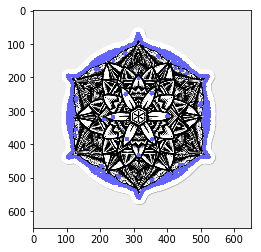

In [13]:
# -------------
# OpenCV (contour)
# -------------

# larger kernel size for blurring might help

# load image
fp1 = './data/geometry.jpg'
img1 = cv2.imread(fp1)
# blur image
img2 = cv2.medianBlur(src=img1, ksize=5)
# grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# binary threshold
ret, img2 = cv2.threshold(src=img2, thresh=160, maxval=255, type=cv2.THRESH_BINARY_INV)
# find contours
contours, hierarchy = cv2.findContours(image=img2.copy(), mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
# show contours (before watershed)
for i,c in enumerate(contours):
    if hierarchy[0][i][3] == -1:
        # external contour
        img2 = cv2.drawContours(image=img1, contours=contours, contourIdx=i, color=(100,100,255), thickness=10)
# plot image
plt.imshow(img2)

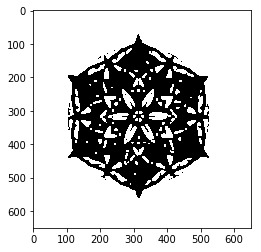

In [18]:
# -------------
# OpenCV (threshold -- otsu)
# -------------


# load image
fp1 = './data/geometry.jpg'
img1 = cv2.imread(fp1)
# blur image
img2 = cv2.medianBlur(src=img1, ksize=5)
# grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# binary threshold
ret, img2 = cv2.threshold(src=img2, thresh=160, maxval=255, type=cv2.THRESH_OTSU)
# noise removal (optional) (morphological operator)
kernel = np.ones((3,3), np.uint8)
img2 = cv2.morphologyEx(src=img2, op=cv2.MORPH_OPEN, kernel=kernel, iterations=2)

# plot threshold
plt.imshow(img2, cmap='gray')

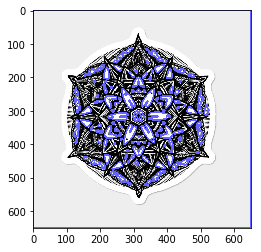

In [30]:
# -------------
# OpenCV (contours -- watershed algorithm)
# -------------

# larger kernel size for blurring might help
# otsu's method works well with watershed algorithm
# distance transform: 
    # binary image: background (0), foreground (1)
    # foreground value increases as it gets further away from background.

# first threshold produces img2, second threshold produces img3

# load image
fp1 = './data/geometry.jpg'
img1 = cv2.imread(fp1)
# blur image
img2 = cv2.medianBlur(src=img1, ksize=3)
# grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# binary threshold
ret, img2 = cv2.threshold(src=img2, thresh=160, maxval=255, type=cv2.THRESH_OTSU)
# noise removal (optional) (morphological operator)
kernel = np.ones((3,3), np.uint8)
img2 = cv2.morphologyEx(src=img2, op=cv2.MORPH_OPEN, kernel=kernel, iterations=2)
# distance transform 
img3 = cv2.distanceTransform(src=img2, distanceType=cv2.DIST_L2, maskSize=5)
# threshold
threshold = 0.7*img3.max()
ret, img3 = cv2.threshold(src=img3, thresh=threshold, maxval=255, type=cv2.THRESH_BINARY) # idk, cv2.THRESH_BINARY
# subtract img2, img3
img3 = np.uint8(img3)
unknown = cv2.subtract(img2, img3)
# get img4 (sure foreground, unknown area, background) (sure foreground will be the seeds for watershed)
ret, img4 = cv2.connectedComponents(img3)
img4 = img4 + 1
img4[unknown==255] = 0
# watershed algorithm
img4 = cv2.watershed(img1, img4)
# find contours
contours, hierarchy = cv2.findContours(image=img2.copy(), mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

# show contours
for i,c in enumerate(contours):
    if hierarchy[0][i][3] == -1:
        # external contour
        img5 = cv2.drawContours(image=img1, contours=contours, contourIdx=i, color=(100,100,255), thickness=3)

# plot image
plt.imshow(img5)

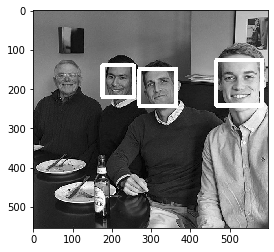

In [26]:
# -------------
# OpenCV (face detection) (viola-jones algorithm with haar cascades)
# -------------

# main features -- edges, lines, four-rectangle 
    # edges = mean_light - mean_dark (the higher the value, the better the edge)
        # calculating all possible edges is computationally expensive.
        # viola-jones algorithm uses the 'integral' image (summed area table).
            # create a rectangle between the top left corner and the current pixel.
            # sum all values, that is the pixel value.
        # the image then goes through a cascade of classifiers.
        # if the image fails a classifier, we can stop attempting to detect a face.

# take an image of a front-facing person
# make grayscale
# search for eyes/cheek, then nose, then eyebrows, then lips
# see if image passes all classifiers

# load image
fp1 = './data/shapiro.png'
img1 = cv2.imread(fp1, 0)
# import classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def detect_face(img):
    img1 = img.copy()
    face_rectangles = face_cascade.detectMultiScale(img1, minNeighbors=5)
    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(img=img1, pt1=(x,y), pt2=(x+w,y+h), color=(255,255,255), thickness=10)
    return img1

img2 = detect_face(img1)
plt.imshow(img2, cmap='gray')